## Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# py.init_notebook_mode()

In [124]:
pip install mlxtend --user

     ---------------------------------------- 1.4/1.4 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("rta_dataset.csv")

In [3]:
df.head() ##returns the number of rows given on a parameter or by default 5 rows from the top

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 Road_allignment Types_of_Junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  Road_surface_type Road_surface_conditions       Light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestri

In [4]:
df.tail(5) ##returns the number of rows given on a parameter or by default 5 rows from the bottom

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
12311   Lorry (11?40Q)            Owner                     NaN   
12312       Automobile            Owner                     NaN   
12313            Bajaj            Owner                  2-5yrs   
12314  Lorry (41?100Q)            Owner                  2-5yrs   
12315            Other            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
12311         No defect   Outside rural areas   
12312         No defect   Outside rural areas   
12313         No defect   Outside rural areas   
12314         No defect          Office areas   
12315         No defect   Outside rural areas   

                                       Lanes_or_Medians  \
12311                                 Undivided Two way   
12312  Two-way (divided with broken lines road marking)   
12313  Two-way (divided with broken lines road marking)   
12314                                 Undivided Two way   
12315                                 Undivided Two way   

                                 Road_allignment Types_of_Junction  \
12311             Tangent road with flat terrain       No junction   
12312                                Escarpments       No junction   
12313  Tangent road with mountainous terrain and       No junction   
12314  Tangent road with mountainous terrain and       No junction   
12315  Tangent road with mountainous terrain and           O Shape   

      Road_surface_type Road_surface_conditions       Light_conditions  \
12311     Asphalt roads                     Dry               Daylight   
12312     Asphalt roads                     Dry               Daylight   
12313     Asphalt roads                     Dry               Daylight   
12314     Asphalt roads                     Dry  Darkness - lights lit   
12315     Asphalt roads                     Dry  Darkness - lights lit   

      Weather_conditions               Type_of_collision  \
12311             Normal  Vehicle with vehicle collision   
12312             Normal  Vehicle with vehicle collision   
12313             Normal  Vehicle with vehicle collision   
12314             Normal  Vehicle with vehicle collision   
12315             Normal  Vehicle with vehicle collision   

       Number_of_vehicles_involved  Number_of_casualties Vehicle_movement  \
12311                            2                     1   Going straight   
12312                            2                     1            Other   
12313                            1                     1            Other   
12314                            2                     1            Other   
12315                            2                     1         Stopping   

        Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
12311               na              na                   na                na   
12312               na              na                   na                na   
12313  Driver or rider            Male                31-50                 3   
12314               na              na                   na                na   
12315       Pedestrian          Female       

In [5]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [6]:
df.sample(5)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
10968  18:13:00     Tuesday              18-30          Male   
11208  16:10:00      Monday              31-50          Male   
9838   15:00:00    Thursday              18-30          Male   
3293   15:00:00      Sunday              18-30          Male   
1529    8:50:00      Friday              31-50          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
10968   Writing & reading                Employee          Below 1yr   
11208  Junior high school                Employee             5-10yr   
9838   Junior high school                Employee              2-5yr   
3293   Junior high school                Employee             5-10yr   
1529   Junior high school                   Owner              1-2yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  \
10968       Automobile            Owner                     NaN   
11208              NaN            Owner                     NaN   
9838   Lorry (41?100Q)            Owner                 Unknown   
3293      Stationwagen            Owner                  2-5yrs   
1529        Motorcycle            Owner                  2-5yrs   

      Defect_of_vehicle Area_accident_occured  \
10968               NaN                 Other   
11208         No defect          Office areas   
9838                NaN                 Other   
3293                NaN                 Other   
1529          No defect     Residential areas   

                                       Lanes_or_Medians  \
10968  Two-way (divided with broken lines road marking)   
11208                       Double carriageway (median)   
9838   Two-way (divided with broken lines road marking)   
3293                                            One way   
1529                                  Undivided Two way   

                      Road_allignment Types_of_Junction Road_surface_type  \
10968  Tangent road with flat terrain               NaN             Other   
11208  Tangent road with flat terrain               NaN     Asphalt roads   
9838   Tangent road with flat terrain       No junction     Asphalt roads   
3293   Tangent road with flat terrain           Y Shape     Asphalt roads   
1529   Tangent road with flat terrain           Y Shape     Asphalt roads   

      Road_surface_conditions Light_conditions Weather_conditions  \
10968                     Dry         Daylight             Normal   
11208                     Dry         Daylight             Normal   
9838                      Dry         Daylight             Normal   
3293                      Dry         Daylight             Normal   
1529                      Dry         Daylight             Normal   

                    Type_of_collision  Number_of_vehicles_involved  \
10968  Vehicle with vehicle collision                            1   
11208  Vehicle with vehicle collision                            1   
9838   Vehicle with vehicle collision                            2   
3293   Vehicle with vehicle collision                            2   
1529       Collision with pedestrians                            1   

       Number_of_casualties Vehicle_movement   Casualty_class Sex_of_casualty  \
10968                     1   Going straight               na              na   
11208                     1           U-Turn  Driver or rider            Male   
9838                      1   Going straight       Pedestrian          Female   
3293                      1            Other       Pedestrian            Male   
1529                      1        Reversing  Driver or rider            Male   

      Age_band_of_casualty Casualty_severity Work_of_casuality  \
10968                   na                na               NaN   
11208                31-50                 3               NaN   
9838                 31-50                 3               NaN   
3293                 31-50                 2     Self-employed   
1529                 31-

In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
df.describe(include=['O']).T ##to check categorical columns

count unique  \
Time                     12316   1074   
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Time                                                             15:30:00   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                       120  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
De

In [9]:
df.isnull().sum() ## checking null values in the dataset

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [10]:
print(f"no. of duplicates in data: {df.duplicated().sum()}")

no. of duplicates in data: 0


In [11]:
print("unique values in column:     count")
df.nunique()

unique values in column:     count


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [12]:
for i in df.columns:
    print(f"unique values in {i}:")
    print(df[i].unique(),'\n')

unique values in Time:
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

unique values in Day_of_week:
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

unique values in Age_band_of_driver:
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

unique values in Sex_of_driver:
['Male' 'Female' 'Unknown'] 

unique values in Educational_level:
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

unique values in Vehicle_driver_relation:
['Employee' 'Unknown' 'Owner' nan 'Other'] 

unique values in Driving_experience:
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

unique values in Type_of_vehicle:
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bi

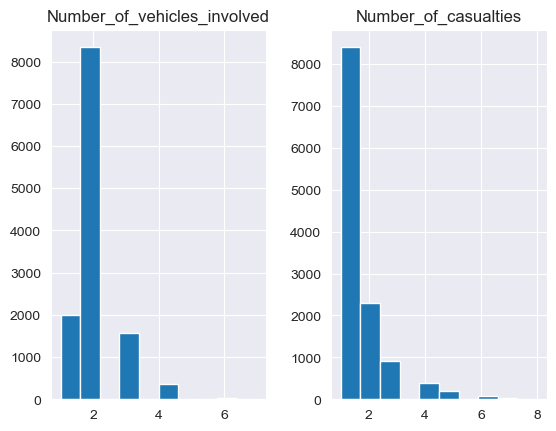

In [13]:
df.hist()
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

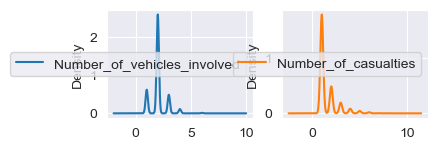

In [14]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False) ##distribution for each attribute is clearer than the histograms.

Number_of_vehicles_involved       Axes(0.125,0.653529;0.227941x0.226471)
Number_of_casualties           Axes(0.398529,0.653529;0.227941x0.226471)
dtype: object

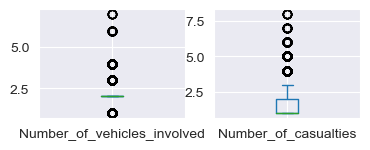

In [15]:
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False, sharey=False)

<Axes: >

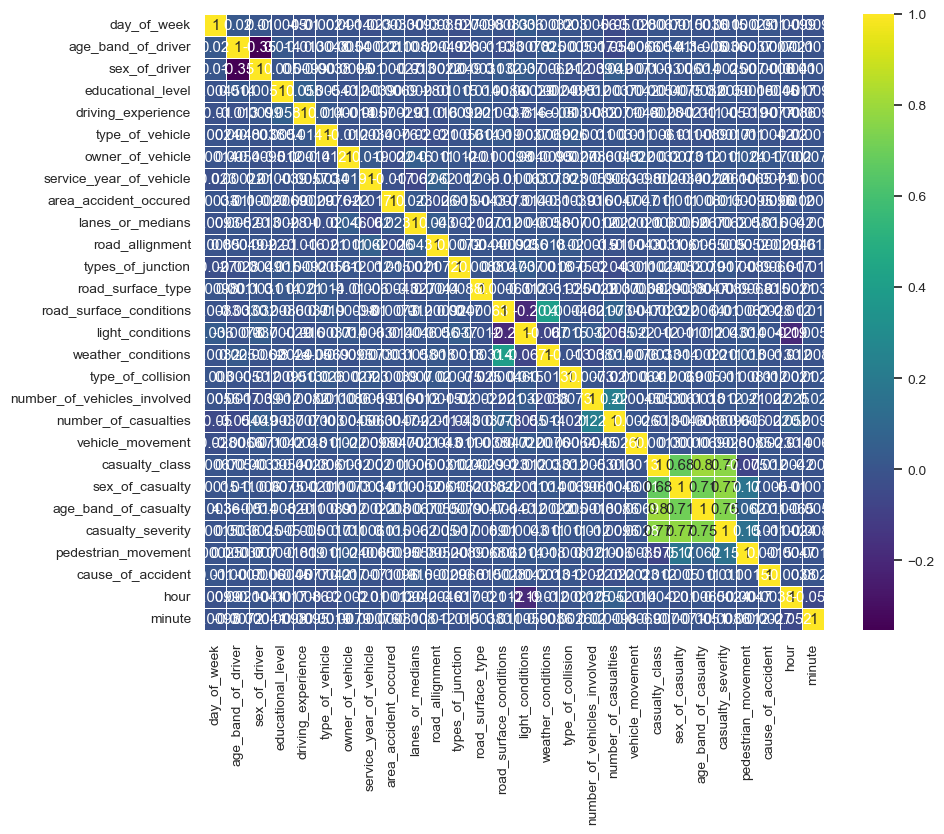

In [66]:
# plot correlation matrix
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)


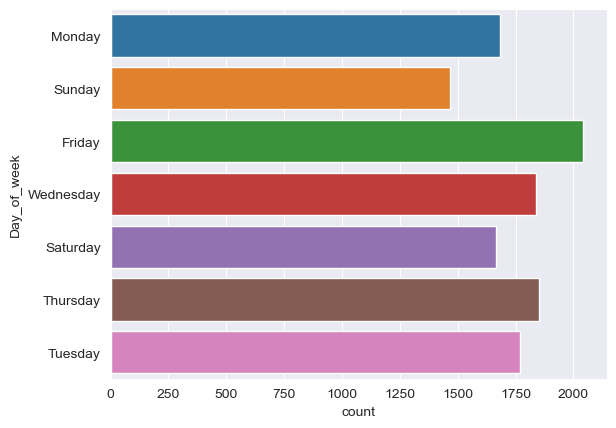

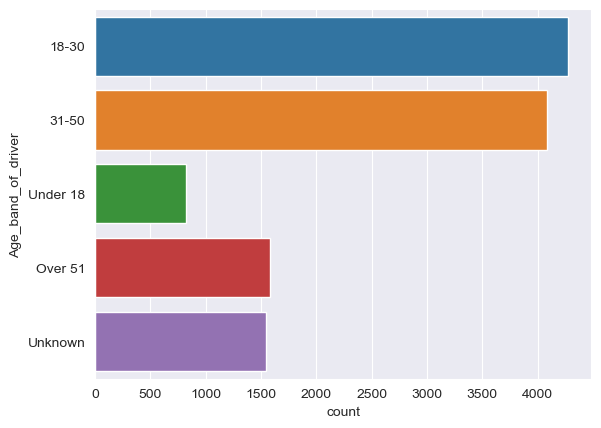

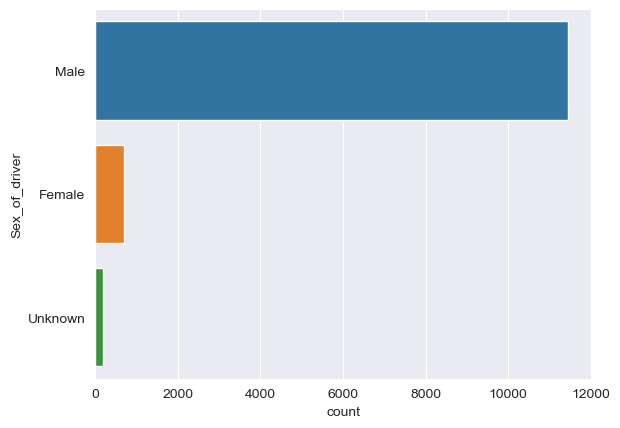

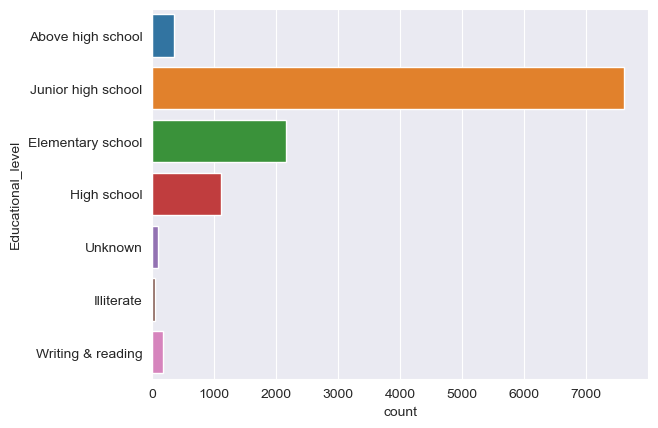

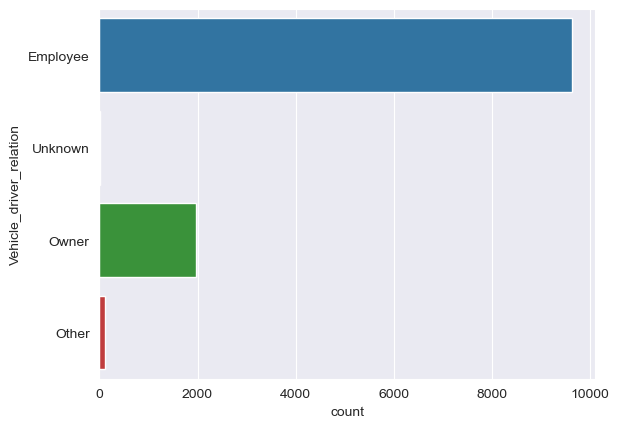

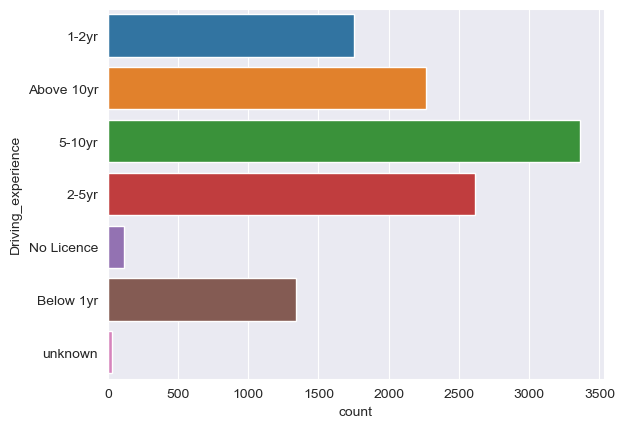

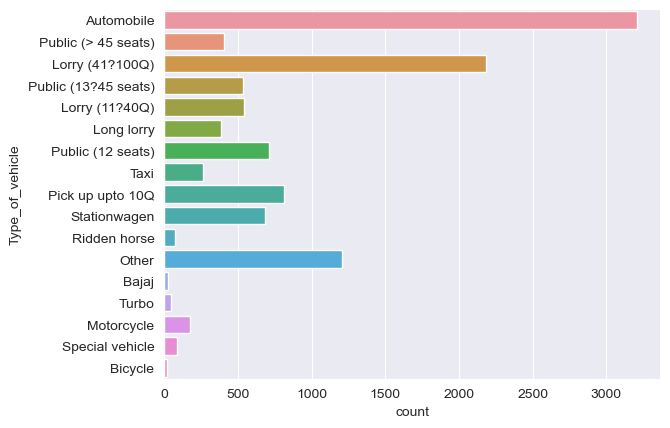

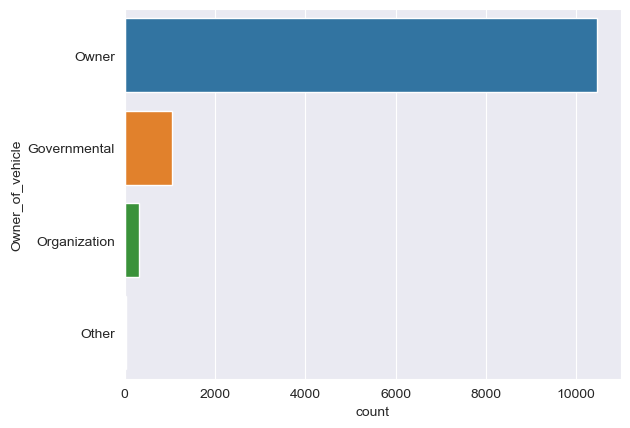

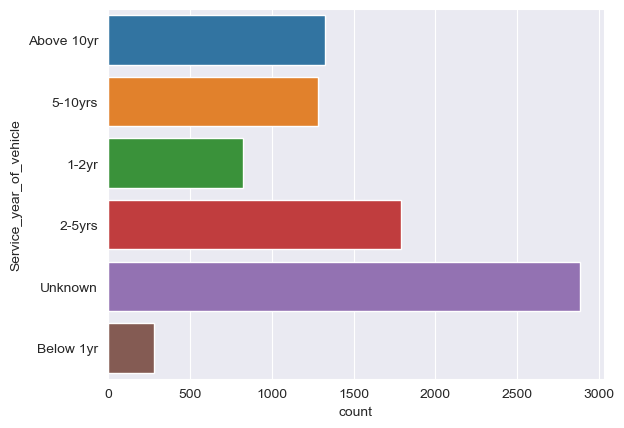

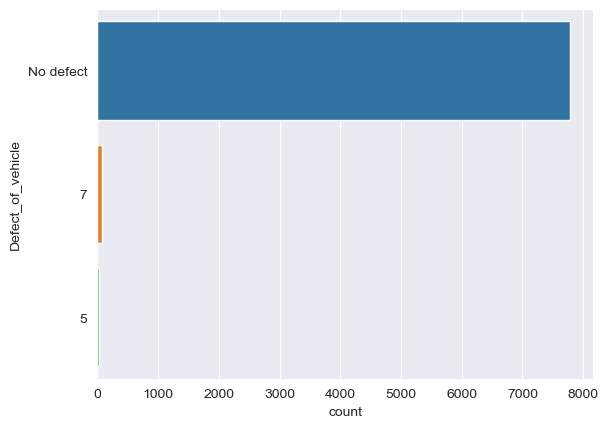

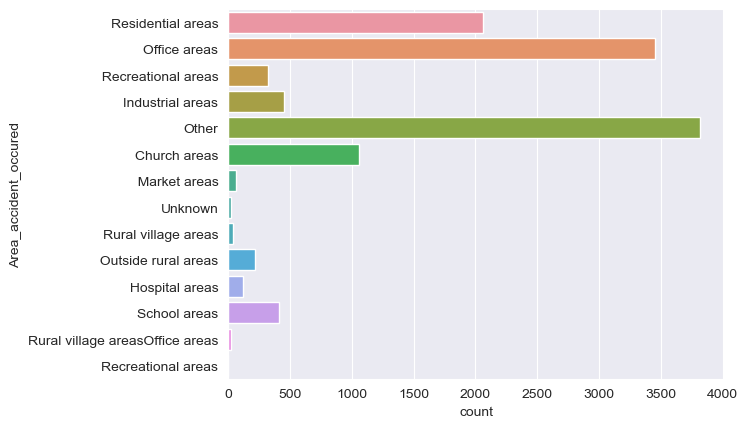

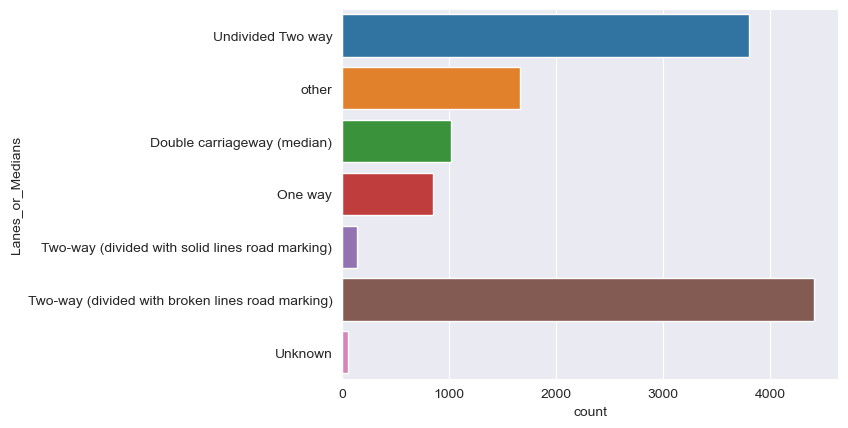

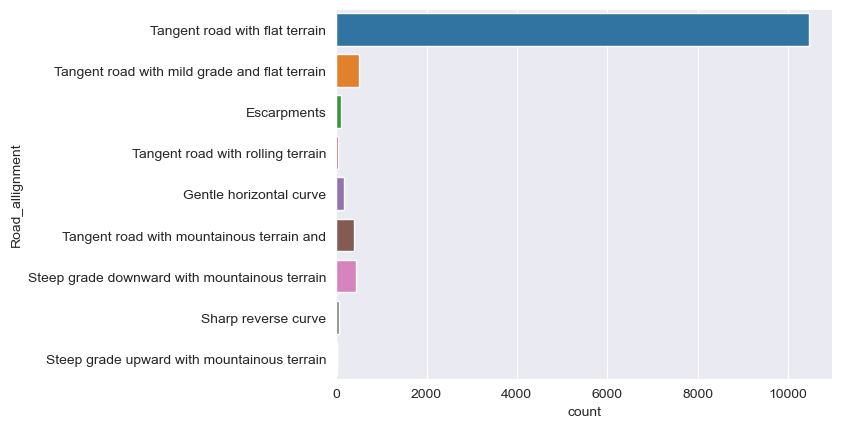

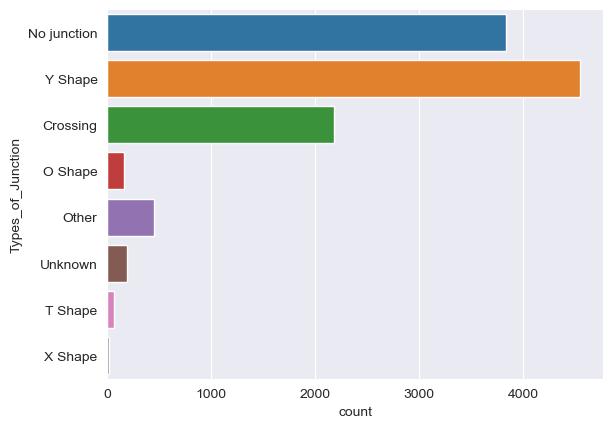

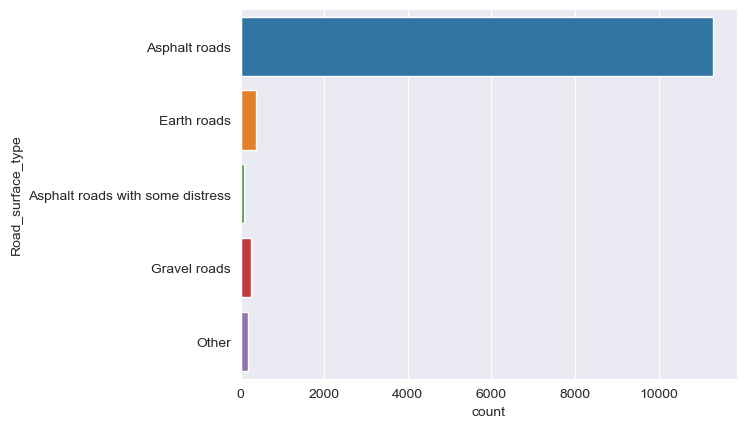

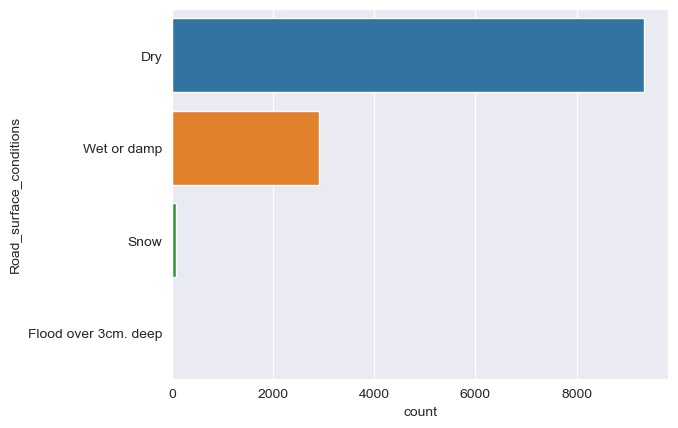

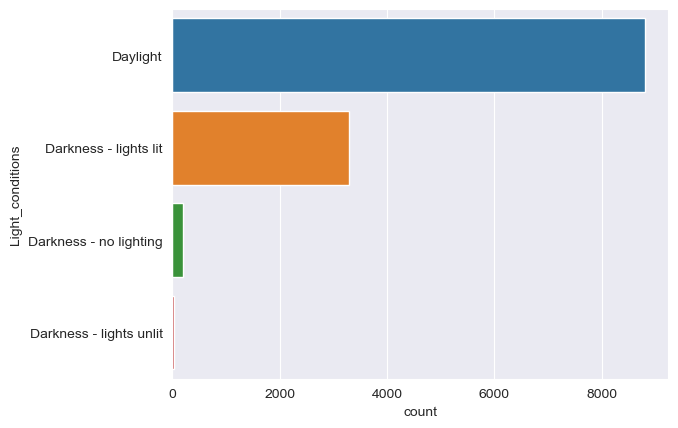

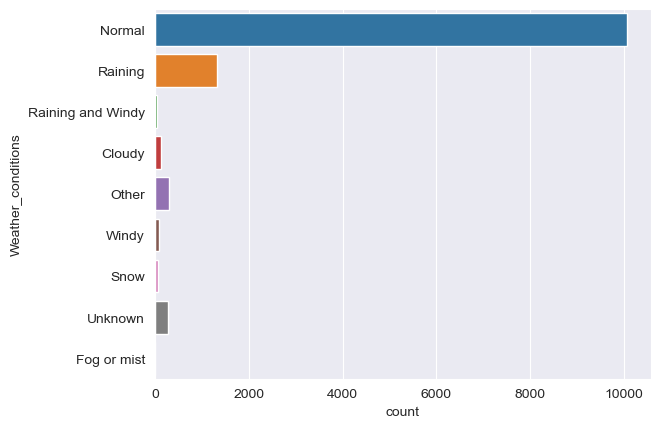

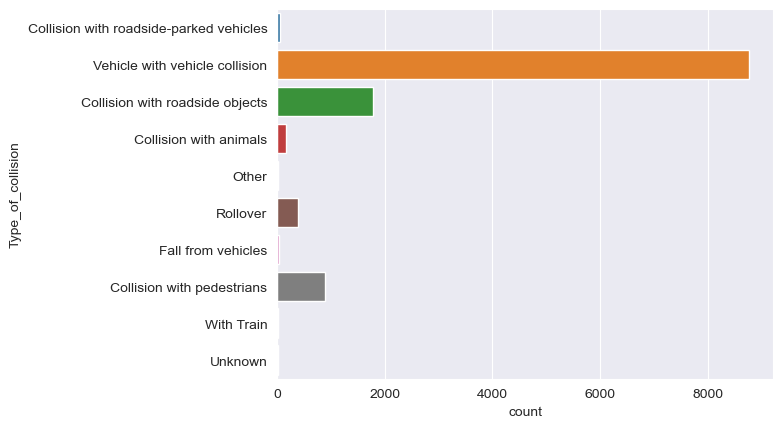

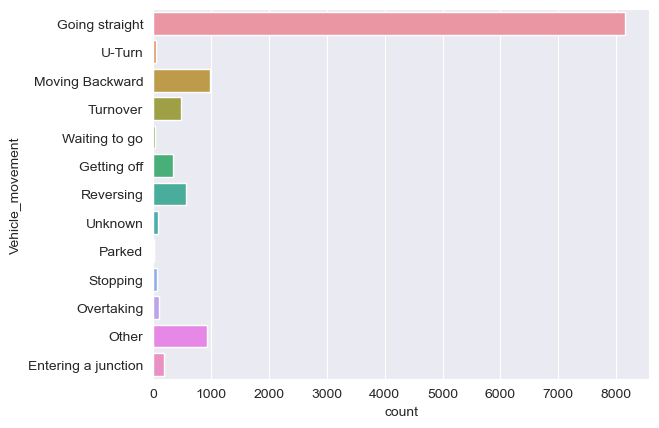

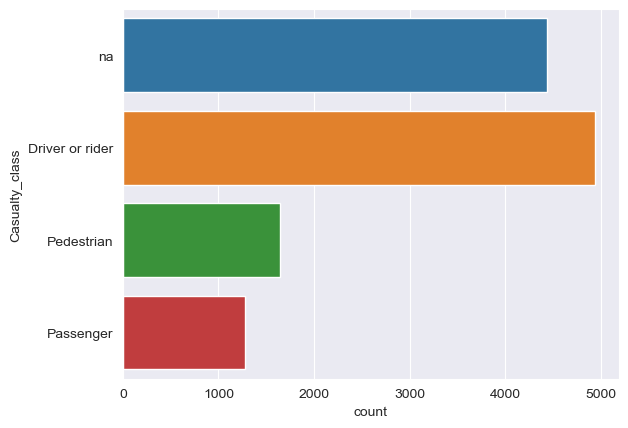

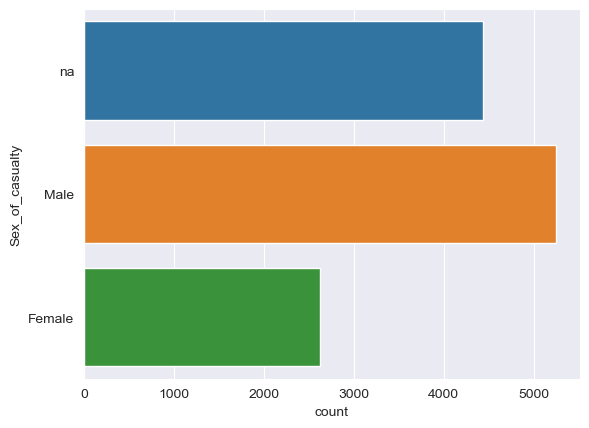

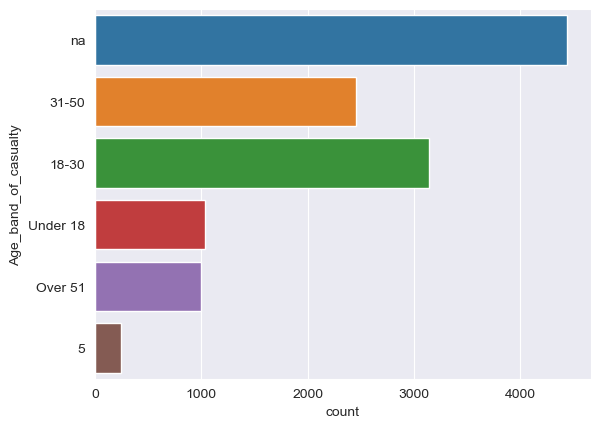

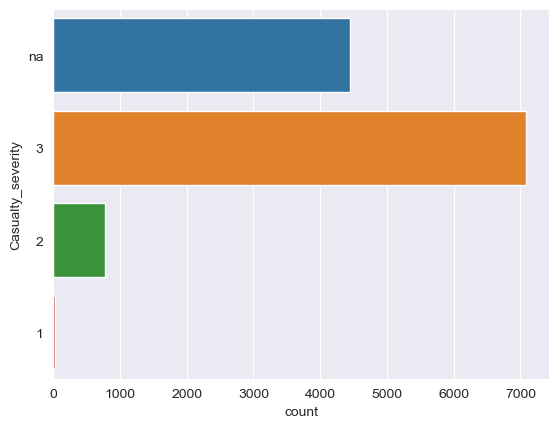

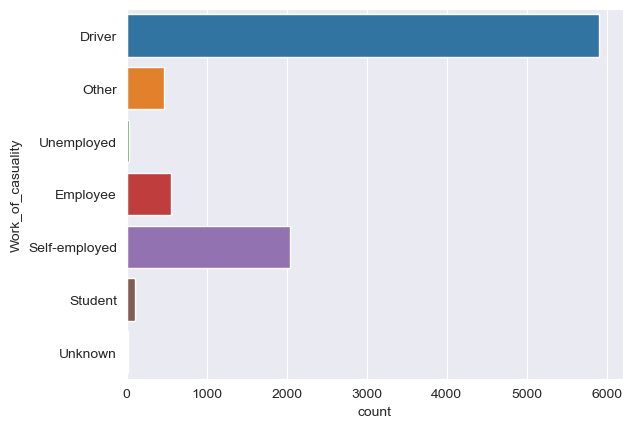

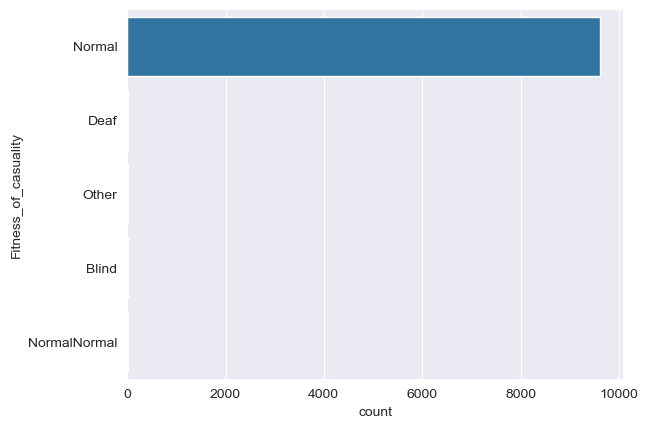

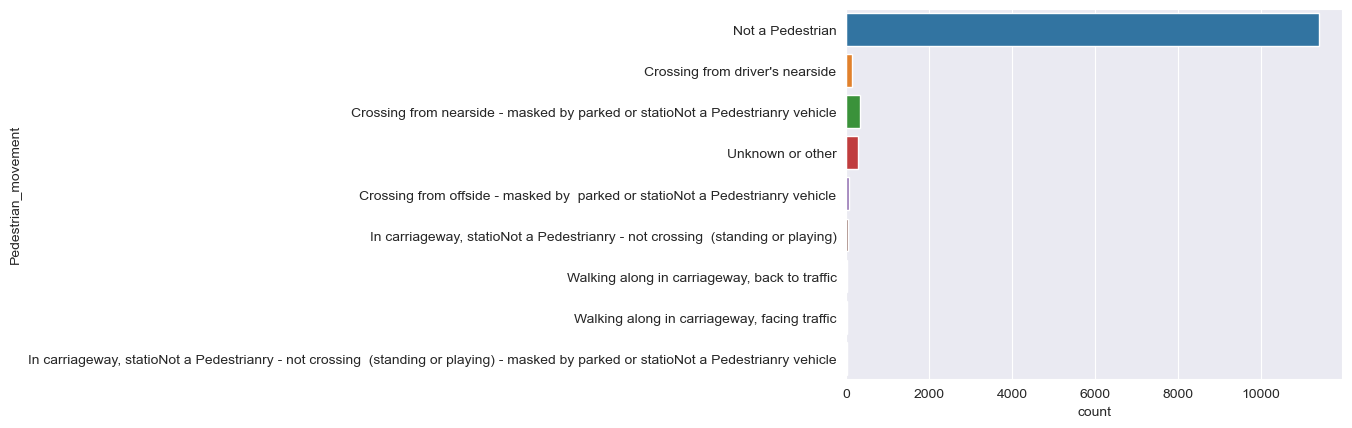

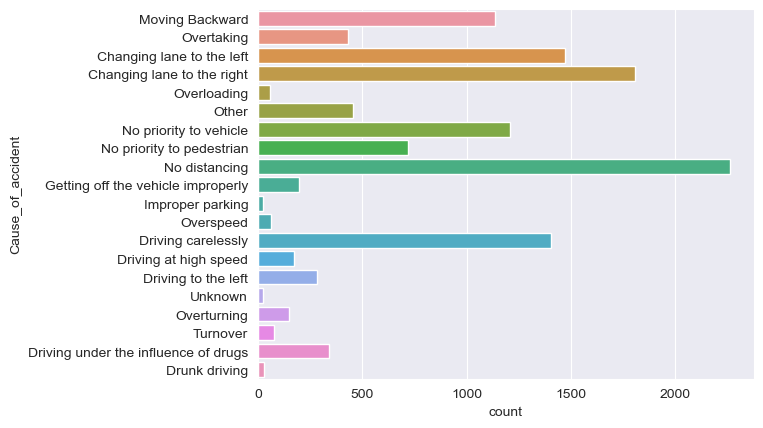

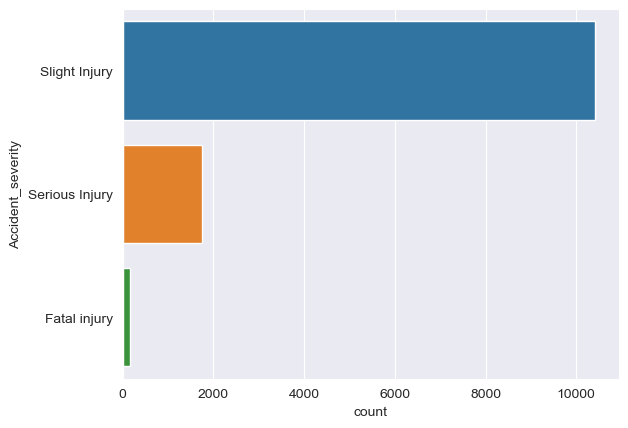

In [17]:
for i in df.select_dtypes(include='object'):
    if df[i].nunique()<=22:
        sns.countplot(y=i,data=df)
        plt.show()

In [18]:
df.columns = map(str.lower, df.columns)

In [19]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

In [20]:
df['accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: accident_severity, dtype: int64

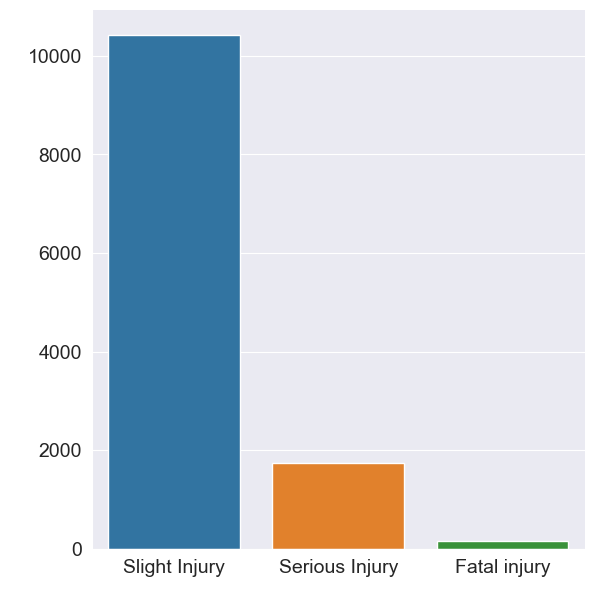

In [21]:
##bar plot to check the count of target var
plt.figure(figsize=(14,7))
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

In [22]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

In [23]:
## feature extraction from time column
df['time'] = pd.to_datetime(df['time'])
df["time"].dt.hour
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

In [24]:
df.head()

day_of_week age_band_of_driver sex_of_driver   educational_level  \
0      Monday              18-30          Male   Above high school   
1      Monday              31-50          Male  Junior high school   
2      Monday              18-30          Male  Junior high school   
3      Sunday              18-30          Male  Junior high school   
4      Sunday              18-30          Male  Junior high school   

  vehicle_driver_relation driving_experience      type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  owner_of_vehicle service_year_of_vehicle defect_of_vehicle  \
0            Owner              Above 10yr         No defect   
1            Owner                 5-10yrs         No defect   
2            Owner                     NaN         No defect   
3     Governmental                     NaN         No defect   
4            Owner                 5-10yrs         No defect   

  area_accident_occured   lanes_or_medians  \
0     Residential areas                NaN   
1          Office areas  Undivided Two way   
2    Recreational areas              other   
3          Office areas              other   
4      Industrial areas              other   

                                 road_allignment types_of_junction  \
0                 Tangent road with flat terrain       No junction   
1                 Tangent road with flat terrain       No junction   
2                                            NaN       No junction   
3  Tangent road with mild grade and flat terrain           Y Shape   
4                 Tangent road with flat terrain           Y Shape   

  road_surface_type road_surface_conditions       light_conditions  \
0     Asphalt roads                     Dry               Daylight   
1     Asphalt roads                     Dry               Daylight   
2     Asphalt roads                     Dry               Daylight   
3       Earth roads                     Dry  Darkness - lights lit   
4     Asphalt roads                     Dry  Darkness - lights lit   

  weather_conditions                        type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

   number_of_vehicles_involved  number_of_casualties vehicle_movement  \
0                            2                     2   Going straight   
1                            2                     2   Going straight   
2                            2                     2   Going straight   
3                            2                     2   Going straight   
4                            2                     2   Going straight   

    casualty_class sex_of_casualty age_band_of_casualty casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  work_of_casuality fitness_of_casuality pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a

In [25]:
df.columns

Index(['day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity', 'hour', 'minute'],
      dtype='object')

1.Hypothesis to check whether serious and fatal accidents happened other than daylight

In [26]:
h_df=df.copy(deep=True)

In [27]:
h2 = pd.crosstab(index=h_df['light_conditions'], columns=h_df['accident_severity'], margins=True)
pd.crosstab(index=h_df['light_conditions'], columns=h_df['accident_severity'], margins=True)
h2

accident_severity        Fatal injury  Serious Injury  Slight Injury    All
light_conditions                                                           
Darkness - lights lit              66             465           2755   3286
Darkness - lights unlit             0               7             33     40
Darkness - no lighting              5              49            138    192
Daylight                           87            1222           7489   8798
All                               158            1743          10415  12316

In [54]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += h2.iloc[j,i]

r = sol/(sum(h2.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')
r = sum(h2.iloc[i,2] for i in [0,1,2])/sum(h2.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.17 %
Slight injuries at night: 0.83 %


In [55]:
r = sum(h2.iloc[3,i] for i in [0,1])/h2.iloc[3,3]
print('Dangerous injuries at day:',round(r,2),'%')
r = h2.iloc[3,2]/h2.iloc[3,3]
print('Slight injuries at day:',round(r,2),'%')

Dangerous injuries at day: 0.15 %
Slight injuries at day: 0.85 %


Although it does that in daylight there are more number of accidents but the dangerous injuries percentage are almost same either be it day or night.

2. Hypothesis to check weather condition for fatal and serious injuries

In [56]:
h1 = pd.crosstab(index=h_df['weather_conditions'], columns=h_df['accident_severity'], margins=True)
pd.crosstab(index=h_df['weather_conditions'], columns=h_df['accident_severity'], margins=True)
h1

accident_severity   Fatal injury  Serious Injury  Slight Injury    All
weather_conditions                                                    
Cloudy                         0               8            117    125
Fog or mist                    0               1              9     10
Normal                       135            1474           8454  10063
Other                          0              28            268    296
Raining                       23             158           1150   1331
Raining and Windy              0               2             38     40
Snow                           0               5             56     61
Unknown                        0              51            241    292
Windy                          0              16             82     98
All                          158            1743          10415  12316

Without any analysis we can clearly see that rainy weather causes more accident and also all the fatal injuries have occured 
under non-normal conditions are there in rainy weather

3. Hypothesis to check whether drivers exp was the factor for accidents?

In [57]:
h3 = pd.crosstab(index=h_df['driving_experience'], columns=[h_df['accident_severity'],h_df['sex_of_driver']], margins=True)

h3

accident_severity  Fatal injury              Serious Injury                \
sex_of_driver            Female Male Unknown         Female  Male Unknown   
driving_experience                                                          
1-2yr                         2   19       0             17   209       2   
2-5yr                         1   45       0             16   362       3   
5-10yr                        2   39       0             29   430       3   
Above 10yr                    0   28       1             26   296       1   
Below 1yr                     0    7       0             10   190       7   
No Licence                    0    0       0              0    12       1   
unknown                       0    1       0              0     6       0   
All                           5  139       1             98  1505      17   

accident_severity  Slight Injury                  All  
sex_of_driver             Female  Male Unknown         
driving_experience                                     
1-2yr                         92  1396      19   1756  
2-5yr                        120  2040      26   2613  
5-10yr                       163  2643      54   3363  
Above 10yr                   107  1775      28   2262  
Below 1yr                     65  1043      20   1342  
No Licence                     6    98       1    118  
unknown                        2    24       0     33  
All                          555  9019     148  11487

4. Hypothesis to check whether particular gender causing accidents?

In [58]:
ff = pd.crosstab(index=h_df['sex_of_driver'].loc[h_df['sex_of_driver'] !="Unknown"], columns=df['accident_severity'], margins=True)
ff

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
sex_of_driver                                                        
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138

In [59]:
((h_df.groupby(['sex_of_driver']).size() / h_df["sex_of_driver"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

sex_of_driver
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

In [61]:
##most of the accidents caused due to male gender.

In [60]:
ff = pd.crosstab(index=h_df['sex_of_driver'].loc[h_df['sex_of_driver'] !="Unknown"], columns=df['accident_severity'], margins=True,normalize=True)*100
ff

accident_severity  Fatal injury  Serious Injury  Slight Injury         All
sex_of_driver                                                             
Female                 0.041193        0.856813       4.877245    5.775251
Male                   1.252266       13.354754      79.617729   94.224749
All                    1.293459       14.211567      84.494974  100.000000

5. Hypothesis to check causes of accidents

In [62]:
h4 = pd.crosstab(index=h_df['cause_of_accident'], columns=h_df['accident_severity'], margins=True)
pd.crosstab(index=h_df['cause_of_accident'], columns=h_df['accident_severity'], margins=True)
h4

accident_severity                     Fatal injury  Serious Injury  \
cause_of_accident                                                    
Changing lane to the left                       16             206   
Changing lane to the right                      23             260   
Driving at high speed                            2              31   
Driving carelessly                              22             209   
Driving to the left                              4              53   
Driving under the influence of drugs             5              46   
Drunk driving                                    0               3   
Getting off the vehicle improperly               3              29   
Improper parking                                 1               2   
Moving Backward                                 26             162   
No distancing                                   20             303   
No priority to pedestrian                        5              95   
No priority to vehicle                          13             149   
Other                                            7              64   
Overloading                                      2              10   
Overspeed                                        1              15   
Overtaking                                       4              75   
Overturning                                      2              23   
Turnover                                         2               6   
Unknown                                          0               2   
All                                            158            1743   

accident_severity                     Slight Injury    All  
cause_of_accident                                           
Changing lane to the left                      1251   1473  
Changing lane to the right                     1525   1808  
Driving at high speed                           141    174  
Driving carelessly                             1171   1402  
Driving to the left                             227    284  
Driving under the influence of drugs            289    340  
Drunk driving                                    24     27  
Getting off the vehicle improperly              165    197  
Improper parking                                 22     25  
Moving Backward                                 949   1137  
No distancing                                  1940   2263  
No priority to pedestrian                       621    721  
No priority to vehicle                         1045   1207  
Other                                           385    456  
Overloading                                      47     59  
Overspeed                                        45     61  
Overtaking                                      351    430  
Overturning                                     124    149  
Turnover                                         70     78  
Unknown                                          23     25  
All                                           10415  12316

In [63]:
print(f'Injuries(all types due to speeding): {h4.iloc[2,2]}/{h4.iloc[3,3]}')
print(f'In percentage: {(h4.iloc[2,2]/h4.iloc[3,3])*100} %')

##It shows that speeding is not contributed much for accidents

Injuries(all types due to speeding): 141/1402
In percentage: 10.057061340941512 %


In [64]:
##Data Pre Processing 

In [29]:
df.isna().sum()

day_of_week                       0
age_band_of_driver                0
sex_of_driver                     0
educational_level               741
vehicle_driver_relation         579
driving_experience              829
type_of_vehicle                 950
owner_of_vehicle                482
service_year_of_vehicle        3928
defect_of_vehicle              4427
area_accident_occured           239
lanes_or_medians                385
road_allignment                 142
types_of_junction               887
road_surface_type               172
road_surface_conditions           0
light_conditions                  0
weather_conditions                0
type_of_collision               155
number_of_vehicles_involved       0
number_of_casualties              0
vehicle_movement                308
casualty_class                    0
sex_of_casualty                   0
age_band_of_casualty              0
casualty_severity                 0
work_of_casuality              3198
fitness_of_casuality        

In [30]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['defect_of_vehicle', 'vehicle_driver_relation', 'work_of_casuality', 'fitness_of_casuality'], inplace=True)

In [31]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for i in impute_cols:
    mode = df[i].mode()[0]
    df[i].fillna(mode, inplace=True)

In [32]:
df.isnull().sum()

day_of_week                    0
age_band_of_driver             0
sex_of_driver                  0
educational_level              0
driving_experience             0
type_of_vehicle                0
owner_of_vehicle               0
service_year_of_vehicle        0
area_accident_occured          0
lanes_or_medians               0
road_allignment                0
types_of_junction              0
road_surface_type              0
road_surface_conditions        0
light_conditions               0
weather_conditions             0
type_of_collision              0
number_of_vehicles_involved    0
number_of_casualties           0
vehicle_movement               0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
pedestrian_movement            0
cause_of_accident              0
accident_severity              0
hour                           0
minute                         0
dtype: int64

In [33]:
df.shape

(12316, 29)

In [34]:
def ordinal_encoder(df, ec): 
    for i in ec:    
        feat_val = list(np.arange(df[i].nunique()))
        feat_key = list(df[i].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[i] = df[i].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
df.shape

(12316, 29)

<Axes: >

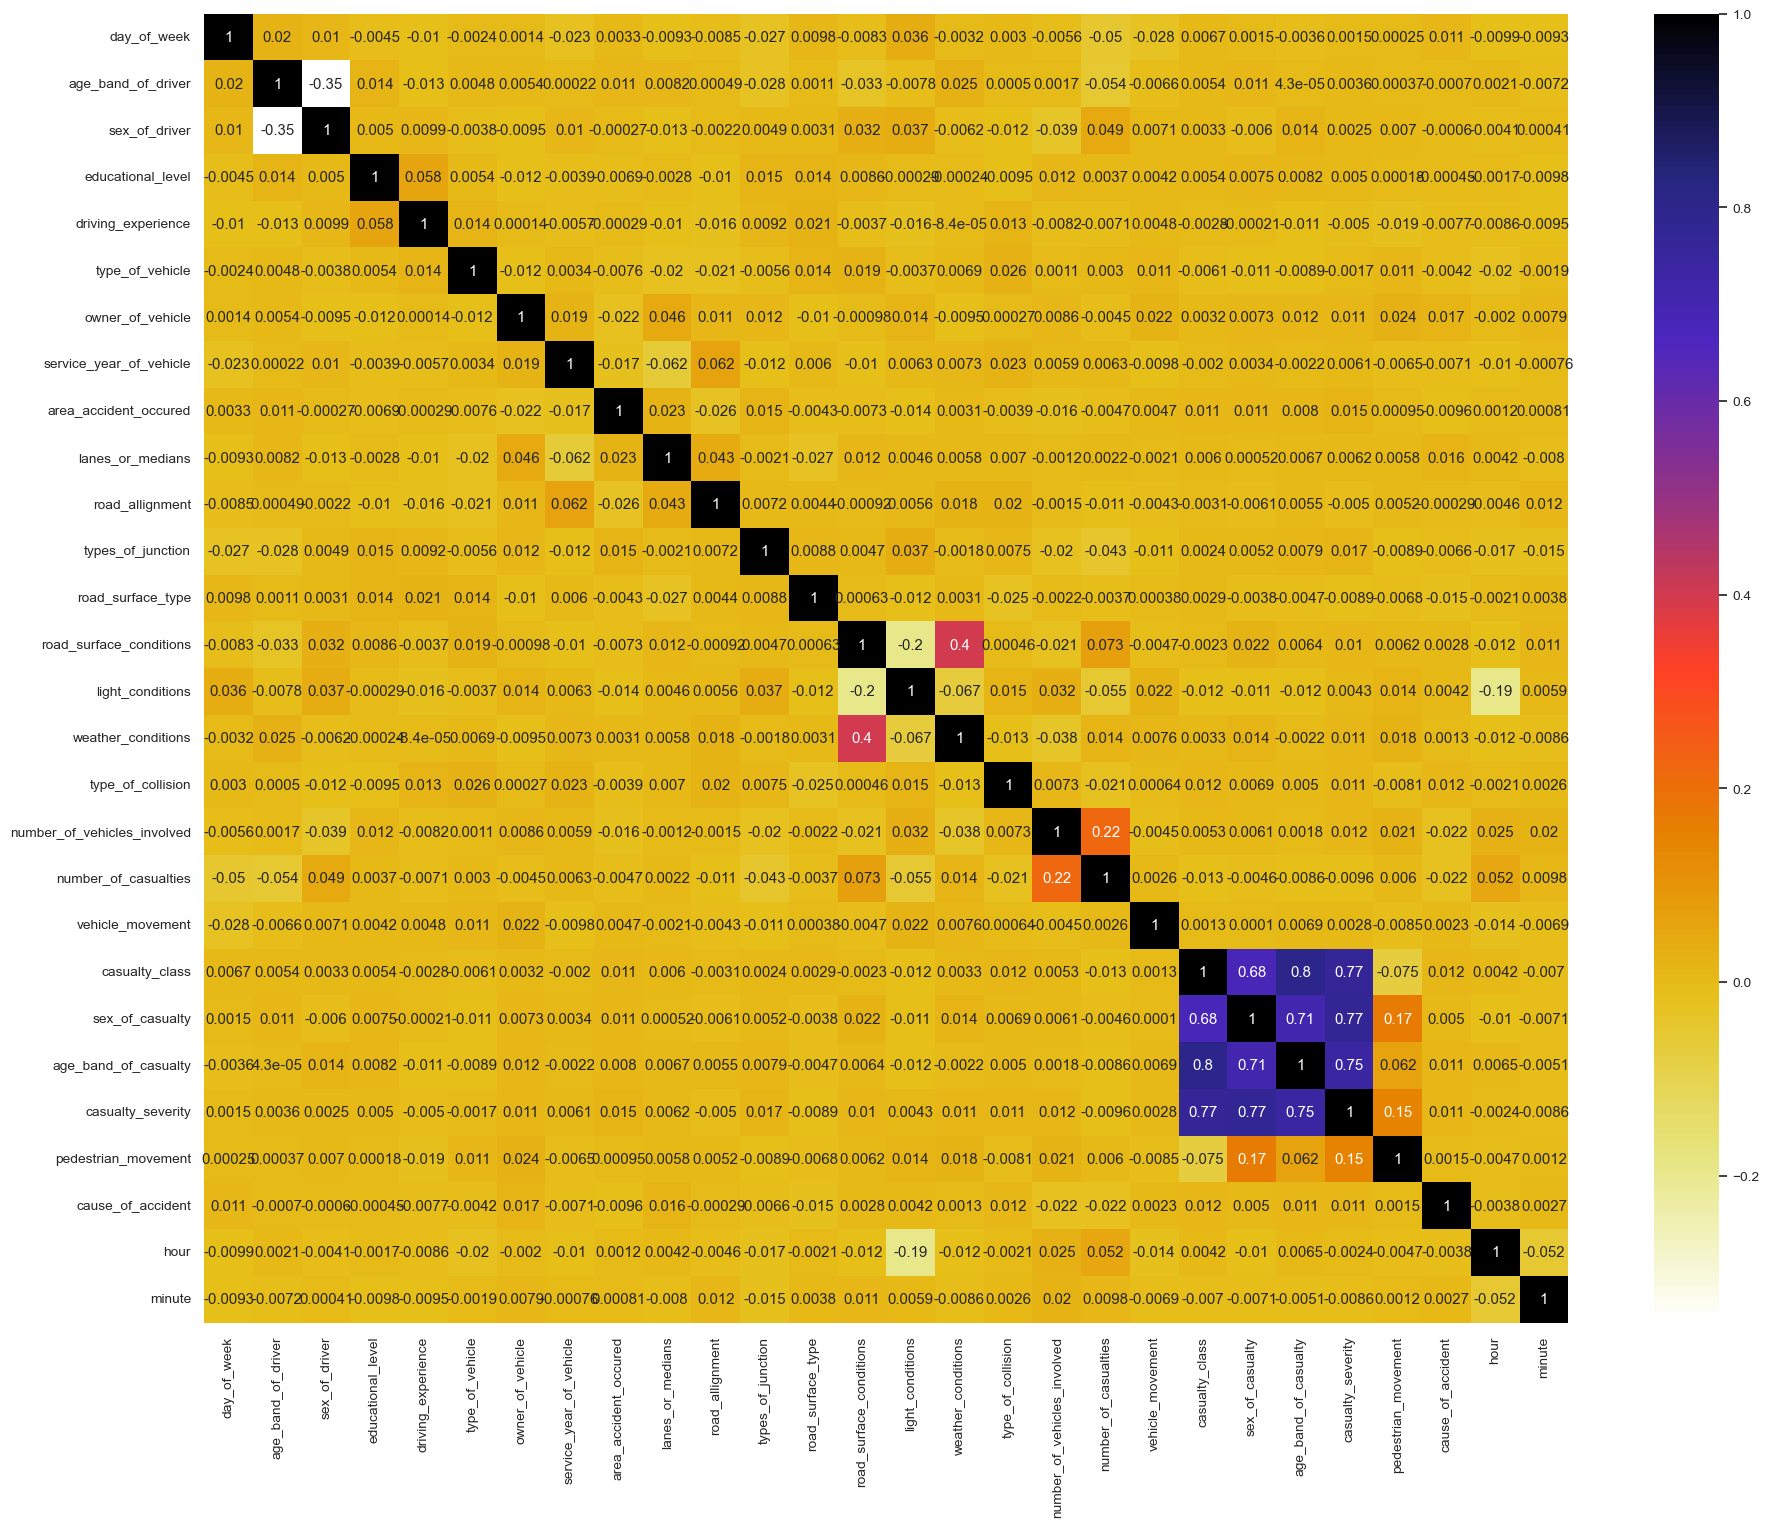

In [35]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.9)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [36]:
##Upsampling on the data
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [37]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [38]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

In [65]:
##Baseline model


In [40]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [41]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8035182679296347], 'rf': [0.798105548037889], 'extree': [0.8140730717185386]}


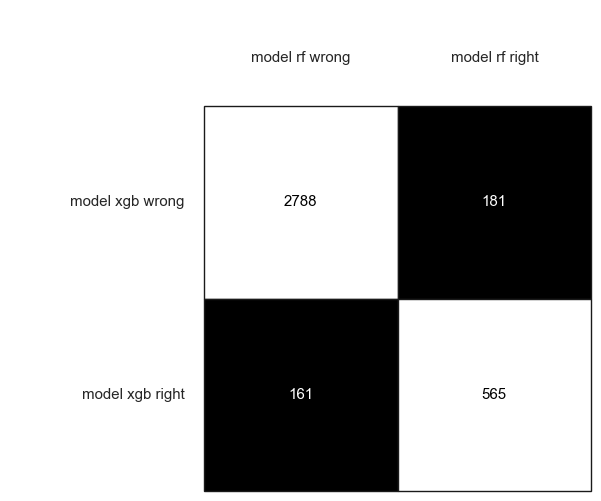

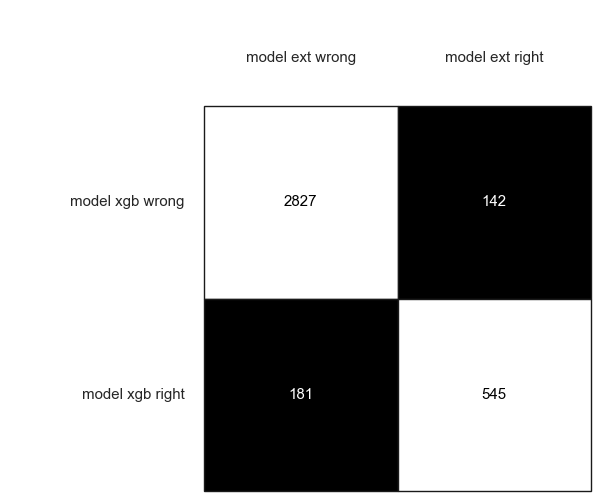

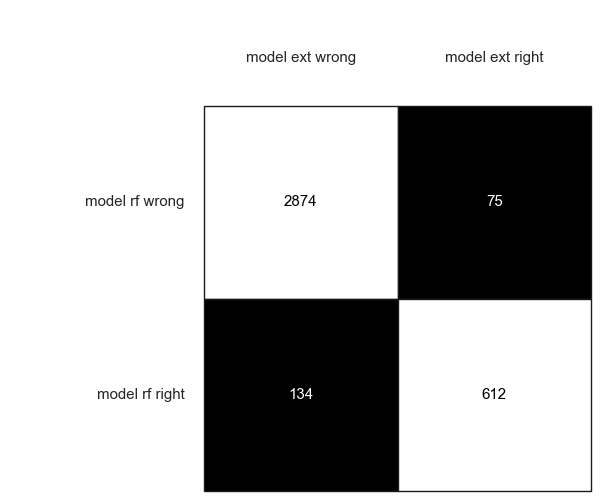

In [43]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [44]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [45]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [46]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
model_performance(extree,y_test, y_pred)

In [48]:
##Hyper parameter tuning
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 400},
 0.8641156399983577)

In [49]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': None, 'max_depth': 15, 'min_samples_split': 2},
 0.9179539168954848)

In [50]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [51]:
print(extree_tuned.feature_importances_)

[0.05302485 0.05870756 0.01657993 0.02999434 0.04193338 0.03130775
 0.02029286 0.03534563 0.027183   0.03861058 0.0134081  0.04258895
 0.01077029 0.04108482 0.06608318 0.01687188 0.03424698 0.06456584
 0.06752743 0.01915176 0.03252798 0.03713986 0.02944115 0.02476531
 0.01068392 0.03735793 0.04086197 0.05794277]


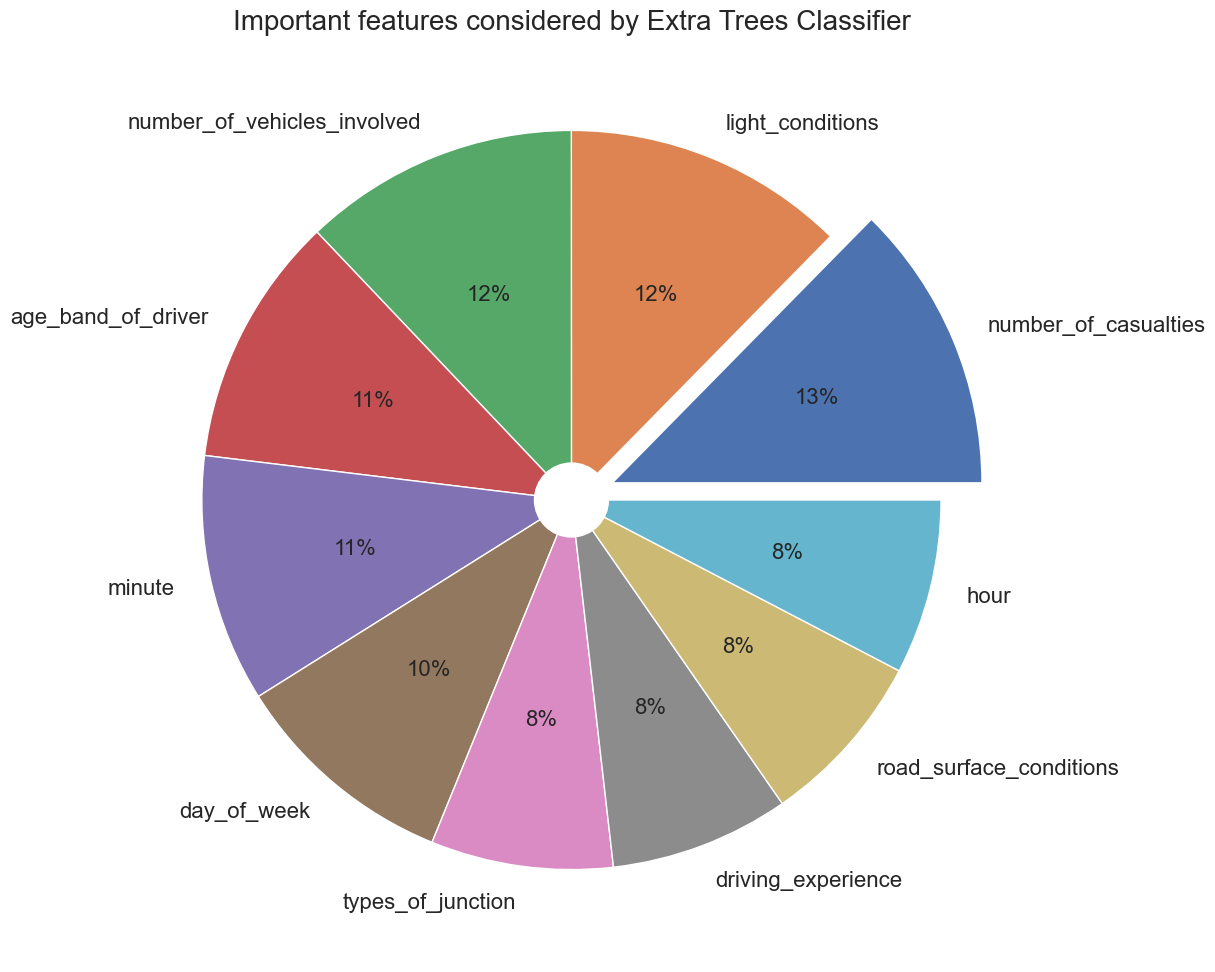

In [52]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()